In [2]:
from Precode2 import *
import numpy
data = np.load('AllSamples.npy')

ModuleNotFoundError: No module named 'Precode2'

In [7]:
k1,i_point1,k2,i_point2 = initial_S2('1679') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [ ]:
import numpy as np
k1,i_point1,k2,i_point2 = (4,np.array([ 6.60277235, 6.31081582]), 6,np.array([7.44472802,2.41849318]))
print(k1)
print(i_point1)
print(k2)
print(i_point2)

In [9]:
def removeCenter(data,centroid):

    center_bool=[np.array_equal(data[i],centroid) for i in range(data.shape[0])]
    data_idx=[not i for i in center_bool]  
    
    init=0
    for x1,x2 in zip(data_idx,data):
        if x1 and init:
            arr=np.vstack((arr,x2))
        if x1 and not init:
            init+=1
            arr=np.array(x2)
    return arr

data1=removeCenter(data,i_point1)
            



NameError: name 'data' is not defined

In [10]:
i_point1=i_point1.reshape(-1,2)

i_point2=i_point2.reshape(-1,2)
    

AttributeError: 'list' object has no attribute 'reshape'

In [11]:
def furthestPoint(data, centroid):  # p1 is full data, while p1 is centroids.

    maxdist = 0
    p = np.empty((1, 2))

    for p1 in data:
        avgDist = 0
        num_centroids = 0

        for p2 in centroid:

            num_centroids += 1
            x1, y1, x2, y2 = p1[0], p1[1], p2[0], p2[1]
            dist = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)
            avgDist += dist

        avgDist = avgDist / num_centroids

        if avgDist > maxdist:
            maxdist = avgDist
            p=p1


    return maxdist, p


In [12]:
def findK(data,initial_centroid,k):
    centroids=initial_centroid
    
    for _ in range(k-1):
        data=removeCenter(data,centroids[-1,:])
        maxdist, p= furthestPoint(data, centroids)
        centroids=np.vstack((centroids,p))
    return data, centroids

data1, centroids1=findK(data,i_point1,k1)
data2, centroids2=findK(data,i_point2,k2)
            

In [13]:
centroids1

array([[ 6.60277235,  6.31081582],
       [ 3.85212146, -1.08715226],
       [ 9.26998864,  9.62492869],
       [ 1.20162248,  7.68639714]])

In [14]:
centroids2

array([[ 7.44472802,  2.41849318],
       [ 2.95297924,  9.65073899],
       [ 3.85212146, -1.08715226],
       [ 9.26998864,  9.62492869],
       [ 1.05217427,  3.88943741],
       [ 8.87578072,  8.96092361]])

In [15]:
import pandas as pd
def ClosestPoints(data,centroid):   # p1 is full data, while p1 is centroids.
    d={}
    data_idx=0

    for p1 in data:
        closest_centroid=0
        dmin=float("inf")
        d[data_idx]=0

        for p2 in centroid:
            x1,y1,x2,y2= p1[0],p1[1],p2[0],p2[1]
            dist = ( (x1-x2)**2 + (y1 - y2)**2 ) **(1/2)
            
            if dist<dmin:
                dmin=dist
                d[data_idx]=[closest_centroid,p1[0],p1[1],dist**2]

            closest_centroid+=1

        data_idx+=1
    return d


def NewCentroids(d):

    
    df=pd.DataFrame(np.array( tuple(d.values()) ))
    intra_cluster=df.iloc[:,[0,3]].groupby(0).sum()
    intra_cluster=np.sum(intra_cluster,axis=0)
    intra_cluster=np.array(intra_cluster)
    
    new_centroids=df.iloc[:,[0,1,2]].groupby(0).mean()
   
    return intra_cluster[0] , np.array(new_centroids)




def RunKmeans(data,centroids, epochs):
    passes=0
    
    while passes<epochs:
        err, centroids=NewCentroids(ClosestPoints(data,centroids))
        #print(centroids)
        #print(err)
        
        
        passes+=1
    return centroids , err

In [18]:
RunKmeans(data,centroids1,100)

(array([[ 6.79532432,  2.78778512],
        [ 2.85235149,  2.28186483],
        [ 6.92822285,  7.92187152],
        [ 3.19669343,  6.8712608 ]]), 803.21672380575683)

In [19]:
RunKmeans(data,centroids2,100)

(array([[ 7.41419243,  2.32169114],
        [ 2.56333815,  6.9782248 ],
        [ 3.14506148,  0.90770655],
        [ 7.75648325,  8.55668928],
        [ 3.49556658,  3.56611232],
        [ 5.46427736,  6.83771354]]), 476.11875167635293)

In [40]:
def RandomCentroids(data,k):
    idx=np.arange(data.shape[0])
    np.random.seed(300)
    np.random.shuffle(idx)
    point_idx=idx[:k]
    return data[point_idx,:]

In [41]:
RandomCentroids(data,1)

array([[ 4.9511002 ,  8.08344216]])

In [42]:
err_plot=[]
for k in range(2,11):
    data1, initial_centroids=findK(data,i_point1,k)
    final_centroids, err = RunKmeans(data,initial_centroids,100)
    err_plot.append(err)

err_plot

[1921.033485856206,
 1293.7774523911348,
 803.21672380575683,
 613.98662860666298,
 469.10726238414708,
 368.96063375731143,
 290.92433447443756,
 273.57309878877174,
 275.19842718008664]

Text(0.5,1,'K means error using different K values part 2')

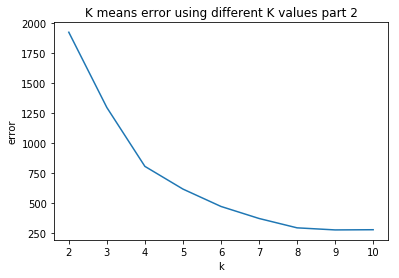

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)),err_plot)
plt.xlabel("k")
plt.ylabel("error")
plt.title("K means error using different K values part 2")